# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "CF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'CF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_CF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.129  1  0.200 0.655 0.001   
                             age        0.114  1  0.177 0.675 0.001   
                             Kiel       2.252  1  3.496 0.063 0.018   
                             Magdeburg  5.867  1  9.108 0.003 0.046   
                             Sweden     9.006  1 13.982 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.990 0.000   
                             age        0.866  1  0.934 0.335 0.005   
                             Kiel       0.015  1  0.016 0.900 0.000   
                             Magdeburg  2.539  1  2.738 0.100 0.014   
                             Sweden    16.023  1 17.278 0.000 0.083   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.184  0.777    False  
                             age               0.171  0.792    False  
                             Kiel              1.200  0.145    False  
                             Magdeburg         2.539  0.012     True  
                             Sweden            3.613  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.004  0.994    False  
                             age               0.475  0.500    False  
                             Kiel              0.046  0.943    False  
                             Magdeburg         1.002  0.208    False  
                             Sweden            4.312  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      CF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.075  1  7.836 0.006 0.039   
                             age        0.011  1  0.078 0.781 0.000   
                             Kiel       0.270  1  1.965 0.163 0.010   
                             Magdeburg  0.413  1  3.007 0.085 0.015   
                             Sweden     1.636  1 11.921 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.160  1  4.180 0.042 0.021   
                             age        0.719  1  1.392 0.240 0.007   
                             Kiel       2.836  1  5.488 0.020 0.028   
                             Magdeburg  3.159  1  6.112 0.014 0.031   
                             Sweden    18.564  1 35.925 0.000 0.158   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.248  0.017     True  
                             age               0.108  0.852    False  
                             Kiel              0.789  0.269    False  
                             Magdeburg         1.073  0.161    False  
                             Sweden            3.165  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.374  0.091    False  
                             age               0.621  0.362    False  
                             Kiel              1.695  0.049     True  
                             Magdeburg         1.845  0.037     True  
                             Sweden            7.998  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     CF                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.248  0.017     True   
                             Kiel      0.163         0.789  0.269    False   
                             Magdeburg 0.085         1.073  0.161    False   
                             Sweden    0.001         3.165  0.003     True   
                             age       0.781         0.108  0.852    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.042         1.374  0.091    False   
                             Kiel      0.020         1.695  0.049     True   
                             Magdeburg 0.014         1.845  0.037     True   
                             Sweden    0.000         7.998  0.000     True   
                             age       0.240         0.621  0.362    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.655         0.184  0.777    False  
                             Kiel      0.063         1.200  0.145    False  
                             Magdeburg 0.003         2.539  0.012     True  
                             Sweden    0.000         3.613  0.001     True  
                             age       0.675         0.171  0.792    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.990         0.004  0.994    False  
                             Kiel      0.900         0.046  0.943    False  
                             Magdeburg 0.100         1.002  0.208    False  
                             Sweden    0.000         4.312  0.000     True  
                             age       0.335         0.475  0.500    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'CF': 'CF', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.226         3.216     0.281     0.261         2.485     0.337
std       0.294         6.082     0.320     0.303         5.334     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.001         0.405     0.002     0.004         0.328     0.014
50%       0.063         1.198     0.127     0.119         0.924     0.238
75%       0.394         3.252     0.525     0.470         2.446     0.626
max       1.000        85.831     1.000     1.000       144.655     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34310/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        CF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.248   
A0A024R0T9;K7ER74;P02655                           AD     0.036         1.444   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.530         0.276   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.250         0.602   
A0A075B6H7                                         AD     0.002         2.663   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.300         0.523   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.489         0.310   
S4R3U6                                             AD     0.042         1.374   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.017     True   
A0A024R0T9;K7ER74;P02655                           AD      0.080    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.650    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.375    False   
A0A075B6H7                                         AD      0.007     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.285    False   
Q9Y6X5                                             AD      0.432    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.160    False   
Q9Y6Y9                                             AD      0.615    False   
S4R3U6                                             AD      0.091    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.655         0.184   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.280   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.066         1.178   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.599         0.223   
A0A075B6H7                                         AD     0.226         0.645   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.153         0.816   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.386         0.414   
S4R3U6                                             AD     0.990         0.004   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.777    False  
A0A024R0T9;K7ER74;P02655                           AD      0.125    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.151    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.730    False  
A0A075B6H7                                         AD      0.379    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        CF                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.236         1.590     0.297     0.256         1.405     0.338
std       0.291         1.858     0.313     0.293         1.637     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.007         0.400     0.020     0.011         0.350     0.037
50%       0.089         1.050     0.168     0.119         0.925     0.238
75%       0.398         2.168     0.529     0.447         1.950     0.607
max       0.999        23.125     1.000     1.000        23.317     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,CF,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,955,1033


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.248  0.017   
A0A024R0T9;K7ER74;P02655                           0.036         1.444  0.080   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.530         0.276  0.650   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.250         0.602  0.375   
A0A075B6H7                                         0.002         2.663  0.007   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.285   
Q9Y6X5                                             0.300         0.523  0.432   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.160   
Q9Y6Y9                                             0.489         0.310  0.615   
S4R3U6                                             0.042         1.374  0.091   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.655   
A0A024R0T9;K7ER74;P02655                              False 0.052   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.066   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.599   
A0A075B6H7                                             True 0.226   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.153   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.386   
S4R3U6                                                False 0.990   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.184  0.777   
A0A024R0T9;K7ER74;P02655                                   1.280  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.178  0.151   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.223  0.730   
A0A075B6H7                                                 0.645  0.379   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.316   
Q9Y6X5                                                     0.816  0.286   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.414  0.550   
S4R3U6                                                     0.004  0.994   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
CF (no)  - PI (no)    894
CF (yes) - PI (yes)   327
CF (yes) - PI (no)    139
CF (no)  - PI (yes)    61
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34310/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


CF                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.248  0.017   
A0A075B6H7                                         0.002         2.663  0.007   
A0A075B6I0                                         0.001         3.145  0.003   
A0A075B6J9                                         0.004         2.393  0.013   
A0A075B6R2                                         0.001         2.891  0.005   
...                                                  ...           ...    ...   
Q9P0K9                                             0.010         1.985  0.028   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.223         0.651  0.344   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                           0.052         1.282  0.108   
Q9UP79                                             0.000         3.489  0.001   
Q9UQ52                                             0.001         3.135  0.003   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.655   
A0A075B6H7                                             True 0.226   
A0A075B6I0                                             True 0.020   
A0A075B6J9                                             True 0.073   
A0A075B6R2                                             True 0.521   
...                                                     ...   ...   
Q9P0K9                                                 True 0.046   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False 0.001   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                              False 0.007   
Q9UP79                                                 True 0.104   
Q9UQ52                                                 True 0.080   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.184  0.777   
A0A075B6H7                                                 0.645  0.379   
A0A075B6I0                                                 1.701  0.059   
A0A075B6J9                                                 1.135  0.164   
A0A075B6R2                                                 0.283  0.670   
...                                                          ...    ...   
Q9P0K9                                                     1.333  0.114   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         3.158  0.004   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                                   2.177  0.024   
Q9UP79                                                     0.982  0.215   
Q9UQ52                                                     1.094  0.176   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A075B6H7                                            False        91  
A0A075B6I0                                            False       194  
A0A075B6J9                                            False       156  
A0A075B6R2                                            False       164  
...                                                     ...       ...  
Q9P0K9                                                False       192  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True       115  
Q9UMX0;Q9UMX0-2;Q9UMX0-4                               True        57  
Q9UP79                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,CF,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.017,0.777,186,CF (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.080,0.125,195,CF (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.650,0.151,174,CF (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.375,0.730,196,CF (no) - PI (no)
A0A075B6H7,0.007,0.379,91,CF (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.285,0.316,197,CF (no) - PI (no)
Q9Y6X5,0.432,0.286,173,CF (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.160,0.181,197,CF (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,CF,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17931,0.009,0.996,174,CF (yes) - PI (no),0.987
O15197;O15197-3,0.002,0.981,104,CF (yes) - PI (no),0.979
O15204;O15204-2,0.001,0.967,156,CF (yes) - PI (no),0.966
P22692;P22692-2,0.030,0.984,170,CF (yes) - PI (no),0.953
P52758,0.947,0.001,119,CF (no) - PI (yes),0.947
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.047,0.057,197,CF (yes) - PI (no),0.010
Q9NX62,0.046,0.055,197,CF (yes) - PI (no),0.009
P00740;P00740-2,0.043,0.053,197,CF (yes) - PI (no),0.009


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_1_CF


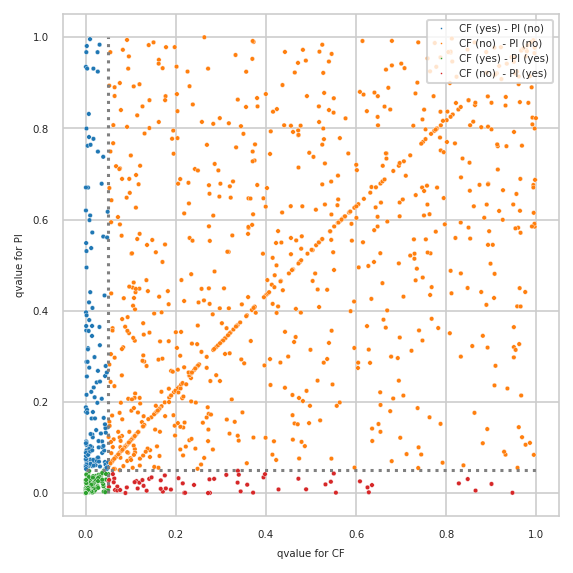

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_CF/diff_analysis_comparision_2_CF


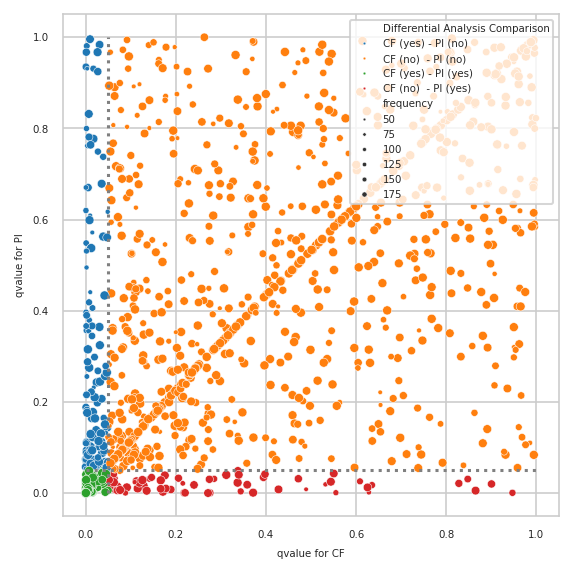

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
U7,U7,0.680
CCDC6,ENSP00000263102,0.680
FOXB1,ENSP00000379369,0.680


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out